# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Robert|secret|
|Renske|secret|
|Nick|secret|
|Thomas|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

Welkom bij onze interactieve code-tutorial over werken met RDF in Python via de library `rdflib`. Laten we om te beginnen de library inladen.

In [2]:
# Eerst installeren: pip install rdflib
import rdflib

RDF staat voor Resource Description Framework en bestaat uit een reeks van World Wide Web Consortium (W3C) specificaties. 
![](http://www.w3.org/TR/rdf11-concepts/rdf-graph.svg)
Een RDF-statement is een triple in de vorm: subject-predicaat-object. 

Elk onderdeel van zo’n triple is een node, een node kan een URI (_uniform resource identifier_) zijn, een blanco node of een literal, een vaste waarde met een datatype.

Voorbeelden van nodes:

In [3]:
from rdflib import URIRef, BNode, Literal

Jan = URIRef("http://example.org/people/Jan") # URI 
Peter = BNode() # Blanco node, als je geen URI (nodig) hebt
name = Literal('Jan') # Literal, voor andere waardes

Jan, Peter, name

(rdflib.term.URIRef('http://example.org/people/Jan'),
 rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb'),
 rdflib.term.Literal('Jan'))

Met een *namespace* kan je wat mooier naar veel URI’s uit één schema refereren.

In [4]:
from rdflib import Namespace

n = Namespace("http://example.org/people/")

n.Jan, n.Peter

(rdflib.term.URIRef('http://example.org/people/Jan'),
 rdflib.term.URIRef('http://example.org/people/Peter'))

Gelukkig zijn er al heel veel RDF schema’s met heel veel resources, die we met een namespace gelijk kunnen gebruiken.

In [5]:
from rdflib.namespace import RDF, RDFS, FOAF

RDF.type, RDFS.label, FOAF.knows

(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
 rdflib.term.URIRef('http://xmlns.com/foaf/0.1/knows'))

In RDF zet je meerdere van zulke statements samen in een *store*, in `rdflib` heb je daarvoor een `Graph`.

In [6]:
from rdflib import Graph

g = Graph()

# triples toevoegen met Graph.add()
g.add((Jan, RDF.type, FOAF.Person))
g.add((Jan, FOAF.knows, Peter))
g.add((Jan, FOAF.name, Literal("Jan")))
g.add((Jan, FOAF.age, Literal(20)))
g.add((Peter, RDF.type, FOAF.Person))
g.add((Peter, FOAF.name, Literal("Peter")))

print("g bevat", len(g), "triples")

# de triples in de Graph
list(g)

g bevat 6 triples


[(rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
  rdflib.term.Literal('Peter')),
 (rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person')),
 (rdflib.term.URIRef('http://example.org/people/Jan'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/age'),
  rdflib.term.Literal('20', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://example.org/people/Jan'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/knows'),
  rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb')),
 (rdflib.term.URIRef('http://example.org/people/Jan'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
  rdflib.term.Literal('Jan')),
 (rdflib.term.URIRef('http://example.org/people/Jan'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.

Objecten van een triple kunnen we ophalen met `Graph.value()`. Met `Graph.set()` kunnen triples worden vervangen.

In [7]:
print(f"Jan is {g.value(Jan, FOAF.age)} jaar oud")

g.set((Jan, FOAF.age, Literal(25)))

print(f"Jan is nu {g.value(Jan, FOAF.age)} jaar oud")

Jan is 20 jaar oud
Jan is nu 25 jaar oud


Voor lastigere vragen kunnen we gebruik maken van SPARQL, een *query*-taal speciaal voor RDF. Hier bijvoorbeeld de namen van iedereen die door Jan gekend wordt.

In [8]:
qres = g.query("""SELECT ?naam WHERE { 
                 <http://example.org/people/Jan> <http://xmlns.com/foaf/0.1/knows> ?iemand.
                 ?iemand <http://xmlns.com/foaf/0.1/name> ?naam.
                 }""")

list(qres)

[(rdflib.term.Literal('Peter'))]

En we kunnen ook wat checks doen op inhoud.

In [9]:
Jan = URIRef("http://example.org/people/Jan")
Bert = URIRef("http://example.org/people/Bert")

# kijken of iemand voorkomt in de graaf
if (Jan, None, None) in g:
    print("Deze graaf heeft triples over Jan")

if (Bert, None, None) in g:
    print("Deze graaf heeft triples over Bert!") # g heeft die niet
    
# type controleren
if (Jan, RDF.type, FOAF.Person) in g:
    print("In de graaf staat dat Jan een Persoon is!")

Deze graaf heeft triples over Jan
In de graaf staat dat Jan een Persoon is!


En nu we klaar zijn met dit deel, kunnen we ook alle triples met Jan als subject verwijderen.

In [10]:
g.remove((Jan, None, None))

print("g bevat", len(g), "triples")

# de triples in de Graph
list(g)

g bevat 2 triples


[(rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
  rdflib.term.Literal('Peter')),
 (rdflib.term.BNode('N7dd565de4c8f4a3fb6a84c4d0f236afb'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))]

`networkx`, een library voor het analyseren van netwerken, werkt ook met allerlei soorten grafen. Eén daarvan is een _directed graph_, waarbij je nodes en edges hebt. Als je het vergelijkt met RDF zijn het subject en object nodes en het predicaat is de edge van het subject naar het object. Een klein voorbeeldje:

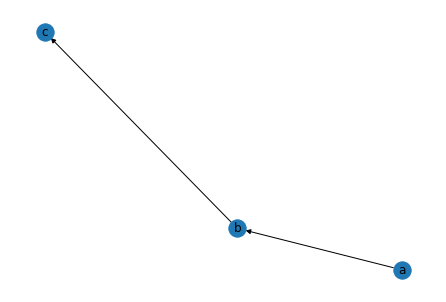

In [11]:
import networkx as nx

DG = nx.DiGraph()
DG.add_edges_from([('a', 'b'), ('b', 'c')])
DG.nodes['a']['M']=True


nx.draw(DG, with_labels=True)

Stel dat we van deze `networkx`-graaf een `rdflib`-graaf willen maken, dan zijn er veel dingen waar we rekening mee moeten houden. Wat betekenen de node-labels eigenlijk? Waar staan onze nodes voor? Voor welke relatie staan de edges? Hoe zetten we het attribuut ‘M’ in onze rdf store? Onderstaande functie zet een `networkx`-graaf om naar een `rdflib`-vraag, maar dan hebben we wel de antwoorden op deze vragen nodig.

In [12]:
def networkx2RDF(G, edges_are, nodes_are=None, labels_are=RDFS.label, attribute_map={}):
    """Maakt van een NetworkX graaf een RDF(lib) triple-store.
    edges_are is een RDF term die beschrijft waar de edges voor staan.
    
    Optioneel:
    * node_are is een RDF term voor de klasse waar de nodes aan toebehoren.
    * labels_are is een RDF term en beschrijft waar het node label voor staat (standaard RDFS.label).
    * attribute_map beschrijft NetworkX node attribute key/value paren
      en door welke RDF(lib) termen zij vervangen worden."""
    g = Graph()
    
    G = nx.convert_node_labels_to_integers(G, label_attribute="label")
    for node, attributes in G.nodes(data=True):
        noderef = URIRef(f"http://example.org/node/{node}")
        if nodes_are:
            g.add((noderef, RDF.type, nodes_are))
        if labels_are:
            g.add((noderef, labels_are, Literal(attributes["label"])))
        for attribute in attributes.items():
            if attribute in attribute_map:
                prop, value = attribute_map[attribute]
                g.add((noderef, prop, value))
        for edge in G.edges(node):
            g.add((noderef, edges_are, URIRef(f"http://example.org/node/{edge[1]}")))
    return g


Een aanname die we wel doen in de functie is dat elke node een nieuwe URI krijgt. Verder slaan we het originele label als literal in een triple met de node op, dus bijvoorbeeld zo: `URIRef("http://example.org/node/0") RDFS.label Literal('a')`. Als die label ook nog een betekenis heeft, zoals bijvoorbeeld een naam, kan `RDFS.label` vervangen worden.

In ons kleine getekende netwerk hierboven staan de nodes voor personen. De edges staan voor een ouder-relatie. Het label op de node is gewoon een label. En het attribuut ‘M’ betekent dat iemand een man is. We maken ook gebruik van een aantal mooie URI’s uit de dbpedia namespace. In code:

In [13]:
dbp = Namespace("http://dbpedia.org/ontology/")
dbr = Namespace("http://dbpedia.org/resource/")

attribute_map = {('M', True): (dbp.gender, dbr.Male)}

dg = networkx2RDF(DG, edges_are=dbp.parent, nodes_are=dbp.Person, attribute_map=attribute_map)

list(dg)

[(rdflib.term.URIRef('http://example.org/node/2'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://dbpedia.org/ontology/Person')),
 (rdflib.term.URIRef('http://example.org/node/0'),
  rdflib.term.URIRef('http://dbpedia.org/ontology/gender'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Male')),
 (rdflib.term.URIRef('http://example.org/node/0'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('a')),
 (rdflib.term.URIRef('http://example.org/node/2'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('c')),
 (rdflib.term.URIRef('http://example.org/node/1'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('b')),
 (rdflib.term.URIRef('http://example.org/node/1'),
  rdflib.term.URIRef('http://dbpedia.org/ontology/parent'),
  rdflib.term.URIRef('http://example.org/node/2')),
 (rdflib.term.URIRef('http://example.o

Dit kan natuurlijk ook voor een wat grotere graaf!


Aantal triples: 211, de eerste drie:


[(rdflib.term.URIRef('http://example.org/node/0'),
  rdflib.term.URIRef('http://dbpedia.org/ontology/gender'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Male')),
 (rdflib.term.URIRef('http://example.org/node/42'),
  rdflib.term.URIRef('http://dbpedia.org/ontology/gender'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Female')),
 (rdflib.term.URIRef('http://example.org/node/45'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('47', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))]

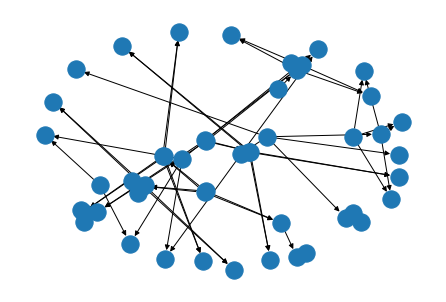

In [14]:
# Graaf
H = nx.DiGraph()

# Edges per groepslid (W2)
robert_edges = [(1,6),(1,8),(1,9),(2,6),(2,8),(2,9),(3,10),(4,10),(5,11),(6,11),(7,12),(7,13),(7,14),(8,12),(8,13),(8,14),(9,15),(9,16),(10,15),(10,16)]
suus_edges = [(20,22),(20,23),(19,22),(19,23),(19,17),(19,21),(18,17),(18,21),(35,18),(35,24),(35,29),(35,32), (35,33),(24,26),(24,27),(24,28),(25,26),(25,27),(25,28),(29,31),(30,31)]
nick_edges = [(36,41),(36,43),(36,44),(37,41),(37,43),(37,44),(38,45),(39,45),(40,46),(41,46),(42,47),(42,48),(42,49),(43,47),(43,48),(43,49),(44,50),(44,51),(45,50),(45,51)]
all_edges = robert_edges + suus_edges + nick_edges
H.add_edges_from(all_edges)

# Geslachten per groepslid (W2)
robert_m = {1,3,6,7,9,11,12,13,15,16}
robert_v = {2,4,5,8,10,14} 
suus_m = {19,23,24,26,27,30,31,33} 
suus_v = {17,18,20,21,22,25,28,29,32,35}
nick_m = {36,38,41,42,44,46,47,48,50,51}
nick_v = {37,39,40,43,45,49}

all_M = robert_m | suus_m | nick_m
all_V = robert_v | suus_v | nick_v

# Toewijzen
for n in all_M:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
for n in all_V:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False
    
nx.draw(H)

# Naar RDF
attribute_map = {('M', True): (dbp.gender, dbr.Male),
                 ('V', True): (dbp.gender, dbr.Female)}

g = networkx2RDF(H, edges_are=dbp.parent, nodes_are=dbp.Person, attribute_map=attribute_map)
print(f"Aantal triples: {len(g)}, de eerste drie:")
list(g)[:3]

En daar kunnen we queries voor schrijven, bijvoorbeeld voor een hele hoop familierelaties.
Via alle ouderrelaties in de store is het mogelijk om bijvoorbeeld alle personen die tante van iemand zijn op te halen door daar een query voor te schrijven. Dit werkt echter alleen als aangetrouwde familieleden kinderen hebben, waardoor er een gedeelde bloedband ontstaat. Pas wanneer er een ouder-relatie aanwezig is, kan de query werken, want dat zijn de enige relaties tussen nodes in de graaf.

In [15]:
# Queries voor alle eerste, tweede en derdegraads familieleden
# Genereert een persoon die in deze query voorkomt
# Door list(query) krijg je alle personen die in die query voorkomen
vader = g.query("""SELECT DISTINCT ?parent WHERE { 
                 ?ik <http://dbpedia.org/ontology/parent> ?parent.
                 ?parent <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                 }""")

moeder = g.query("""SELECT DISTINCT ?parent WHERE { 
                 ?ik <http://dbpedia.org/ontology/parent> ?parent.
                 ?parent <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                 }""")

zoon = g.query("""SELECT DISTINCT ?zoon WHERE { 
                 ?zoon <http://dbpedia.org/ontology/parent> ?ik.
                 ?parent <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                 }""")

dochter = g.query("""SELECT DISTINCT ?dochter WHERE { 
                 ?dochter <http://dbpedia.org/ontology/parent> ?ik.
                 ?dochter <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                 }""")

broer = g.query("""SELECT DISTINCT ?broer WHERE { 
                ?broer <http://dbpedia.org/ontology/parent> ?ouder. 
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?broer <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                }""")

zus = g.query("""SELECT DISTINCT ?broer WHERE { 
                ?broer <http://dbpedia.org/ontology/parent> ?ouder. 
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?broer <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                }""")

grootvader = g.query("""SELECT DISTINCT ?grootvader WHERE { 
                ?ouder <http://dbpedia.org/ontology/parent> ?grootvader.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?grootvader <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                }""")

grootmoeder = g.query("""SELECT DISTINCT ?grootmoeder WHERE { 
                ?ouder <http://dbpedia.org/ontology/parent> ?grootmoeder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?grootmoeder <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                }""")

kleinzoon = g.query("""SELECT DISTINCT ?kleinzoon WHERE { 
                 ?zoon <http://dbpedia.org/ontology/parent> ?ik.
                 ?kleinzoon <http://dbpedia.org/ontology/parent> ?zoon.
                 ?kleinzoon <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                 }""")

kleindochter = g.query("""SELECT DISTINCT ?kleindochter WHERE { 
                 ?dochter <http://dbpedia.org/ontology/parent> ?ik.
                 ?kleindochter <http://dbpedia.org/ontology/parent> ?dochter.
                 ?kleindochter <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                 }""")

oom = g.query("""SELECT DISTINCT ?oom WHERE {{
                ?oom <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?oom <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER(?ouder != ?oom)}
                UNION 
                {?tante <http://dbpedia.org/ontology/parent> ?grootouder.
                ?neef <http://dbpedia.org/ontology/parent> ?tante.
                ?neef <http://dbpedia.org/ontology/parent> ?oom.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?oom <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER(?ouder != ?oom && ?oom != ?tante)}
                }""")

tante = g.query("""SELECT DISTINCT ?tante WHERE {{ 
                ?tante <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?tante <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER(?ouder != ?tante)}
                UNION 
                {?oom <http://dbpedia.org/ontology/parent> ?grootouder.
                ?neef <http://dbpedia.org/ontology/parent> ?oom.
                ?neef <http://dbpedia.org/ontology/parent> ?tante.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?tante <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER(?ouder != ?tante && ?oom != ?tante)}
                }""")

neef = g.query("""SELECT DISTINCT ?neef WHERE { 
                ?tante <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?neef <http://dbpedia.org/ontology/parent> ?tante.
                ?neef <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER(?ouder != ?tante)
                }""")

nicht = g.query("""SELECT DISTINCT ?nicht WHERE { 
                ?tante <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?ouder.
                ?nicht <http://dbpedia.org/ontology/parent> ?tante.
                ?nicht <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER(?ouder != ?tante)
                }""")

oomzegger = g.query("""SELECT DISTINCT ?oomzegger WHERE {{ 
                ?tante <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?grootouder.
                ?oomzegger <http://dbpedia.org/ontology/parent> ?tante.
                ?ik <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER(?ik != ?tante)}
                UNION 
                {?vrouw <http://dbpedia.org/ontology/parent> ?grootouder.
                ?zoon <http://dbpedia.org/ontology/parent> ?vrouw.
                ?zoon <http://dbpedia.org/ontology/parent> ?ik.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?oomzegger <http://dbpedia.org/ontology/parent> ?ouder.
                ?ik <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER(?ouder != ?vrouw && ?ik != ?vrouw)}
                }""")

tantezegger = g.query("""SELECT DISTINCT ?tantezegger WHERE {{ 
                ?broer <http://dbpedia.org/ontology/parent> ?grootouder.
                ?ik <http://dbpedia.org/ontology/parent> ?grootouder.
                ?tantezegger <http://dbpedia.org/ontology/parent> ?broer.
                ?ik <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER(?ik != ?broer)}
                UNION 
                {?man <http://dbpedia.org/ontology/parent> ?grootouder.
                ?zoon <http://dbpedia.org/ontology/parent> ?man.
                ?zoon <http://dbpedia.org/ontology/parent> ?ik.
                ?ouder <http://dbpedia.org/ontology/parent> ?grootouder.
                ?tantezegger <http://dbpedia.org/ontology/parent> ?ouder.
                ?ik <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER(?ouder != ?man && ?ik != ?man)}
                }""")

# Vervang oomzegger door een andere query en bekijk de resultaten!
# Je kan ook nog ?ik aan het select-deel toevoegen om te kijken met wie de familierelatie is
list(oomzegger)

[(rdflib.term.URIRef('http://example.org/node/7')),
 (rdflib.term.URIRef('http://example.org/node/5')),
 (rdflib.term.URIRef('http://example.org/node/23')),
 (rdflib.term.URIRef('http://example.org/node/34')),
 (rdflib.term.URIRef('http://example.org/node/38')),
 (rdflib.term.URIRef('http://example.org/node/39')),
 (rdflib.term.URIRef('http://example.org/node/41')),
 (rdflib.term.URIRef('http://example.org/node/4')),
 (rdflib.term.URIRef('http://example.org/node/0'))]

Nu we weten hoe we familierelaties weergeven aan de hand van queries, gaan we dit ook voor de gender/seksuele oriëntatie proberen. We gebruiken hiervoor de letters LHBTQI en de definitie van hetero. Er zijn er natuurlijk nog veel meer, maar het idee is juist dat we niet meer zo veel in hokjes denken, dus dat gaan we ook vooral niet doen. Hieronder wordt ook eerst weer een `networkx`-graph aangemaakt waar we alle letters in stoppen, en die zetten we weer om naar een `rdflib` versie.

In [16]:
H = nx.DiGraph()

# 1 is een homoman
# 2 is een biseksuele man
# 3 is een lesbische vrouw
# 4 is een biseksuele vrouw
# 5 is een heteroseksuele transman
# 6 is een biseksuele queerpersoon
# 7 is een intersekse persoon die zich als vrouw identificeert en heteroseksueel is
H.add_edges_from([(1,2),(2,1),(2,4),(3,4),(4,2),(4,3),(5,4),(6,4),(6,2),(7,5)])

# Primitievensets
Mset = {1,2,5}
Vset = {3,4,7}
Qset = {6}
GVset = {3,4,5,7}
GMset = {1,2,6,7}

# Eigenschappen
for n in Mset:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
    H.nodes[n]['Q']=False  
for n in Vset:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False
    H.nodes[n]['Q']=False
for n in Qset:
    H.nodes[n]['V']=False
    H.nodes[n]['M']=False
    H.nodes[n]['Q']=True 
for n in GMset:
    H.nodes[n]['GM']=True
    H.nodes[n]['GV']=False
for n in GVset:
    H.nodes[n]['GV']=True
    H.nodes[n]['GM']=False
for n in GMset&GVset:
    H.nodes[n]['GV']=True
    H.nodes[n]['GM']=True
    
attribute_map = {('M', True): (dbp.gender, dbr.Male),
                 ('V', True): (dbp.gender, dbr.Female),
                 ('Q', True): (dbp.gender, dbr.Genderqueer),
                 ('GM', True): (dbp.sex, dbr.Male),
                 ('GV', True): (dbp.sex, dbr.Female)}

h = networkx2RDF(H, edges_are=URIRef("http://example.org/attracted_to/"), nodes_are=dbp.Person, attribute_map=attribute_map)
print(f"Aantal triples: {len(h)}, de eerste drie:")
list(h)[:3]

Aantal triples: 39, de eerste drie:


[(rdflib.term.URIRef('http://example.org/node/4'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://example.org/node/2'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('4', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://example.org/node/6'),
  rdflib.term.URIRef('http://example.org/attracted_to/'),
  rdflib.term.URIRef('http://example.org/node/4'))]

Nu we de graph hebben gemaakt, kunnen we alle letters definiëren en aan de hand van de graph zien of de gedefinieerde relaties kloppen. Boven elke query staat aangegeven hoe wij die seksualiteit of identiteit definiëren, omdat dit niet altijd even zwart-wit is en er nog over gediscussieerd kan worden.

In [17]:
# Iemand is hetero als die persoon alleen op het andere geslacht valt
hetero = h.query("""SELECT DISTINCT ?hetero WHERE {{
                ?hetero <http://example.org/attracted_to/> ?man.
                ?hetero <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER (NOT EXISTS {?hetero <http://example.org/attracted_to/> ?vrouw.
                ?vrouw <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.}).}
                UNION{
                ?hetero <http://example.org/attracted_to/> ?vrouw.
                ?hetero <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                ?vrouw <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER (NOT EXISTS {?hetero <http://example.org/attracted_to/> ?man.
                ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.}).}
                }""")

# Iemand is homo als die persoon een man is die alleen op andere mannen valt
homo = h.query("""SELECT DISTINCT ?homo WHERE {
                ?homo <http://example.org/attracted_to/> ?man.
                ?homo <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER NOT EXISTS {?homo <http://example.org/attracted_to/> ?vrouw.
                ?vrouw <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.}
                }""")

# Iemand is een lesbisch als die persoon een vrouw is die alleen op andere vrouwen valt
lesbi = h.query("""SELECT DISTINCT ?lesbi WHERE { 
                 ?lesbi <http://example.org/attracted_to/> ?woman.
                 ?lesbi <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                 ?woman <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                 FILTER NOT EXISTS {?lesbi <http://example.org/attracted_to/> ?man.
                 ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.}
                 }""")

# Iemand is biseksueel als die persoon een man of een vrouw is die op hetzelfde en andere geslacht valt
biseksueel = h.query("""SELECT DISTINCT ?hetero WHERE {{
                ?hetero <http://example.org/attracted_to/> ?man.
                ?hetero <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER (EXISTS {?hetero <http://example.org/attracted_to/> ?vrouw.
                ?vrouw <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.}).}
                UNION{
                ?hetero <http://example.org/attracted_to/> ?vrouw.
                ?hetero <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                ?vrouw <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER (EXISTS {?hetero <http://example.org/attracted_to/> ?man.
                ?man <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.}).}
                }""")

# Iemand is een transvrouw als die persoon geboren is als man en zich nu identificeert als vrouw
transvrouw = h.query("""SELECT DISTINCT ?transgender WHERE {
                ?transgender <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                ?transgender <http://dbpedia.org/ontology/sex> <http://dbpedia.org/resource/Male>.
                }""")

#Iemand is een transvrouw als die persoon geboren is als man en zich nu identificeert als man
transman = h.query("""SELECT DISTINCT ?transgender WHERE {
                ?transgender <http://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                ?transgender <http://dbpedia.org/ontology/sex> <http://dbpedia.org/resource/Female>.
                }""")

#Iemand is queer als die persoon geen hetero is of genderqueer is
queer = h.query("""SELECT DISTINCT ?hetero WHERE {{
                ?hetero <http://example.org/attracted_to/> ?man.
                MINUS {{
                ?hetero <http://example.org/attracted_to/> ?man.
                ?hetero <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                ?man <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                FILTER (NOT EXISTS {?hetero <http://example.org/attracted_to/> ?vrouw.
                ?vrouw <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.}).}
                UNION{
                ?hetero <http://example.org/attracted_to/> ?vrouw.
                ?hetero <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.
                ?vrouw <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Female>.
                FILTER (NOT EXISTS {?hetero <http://example.org/attracted_to/> ?man.
                ?man <https://dbpedia.org/ontology/gender> <http://dbpedia.org/resource/Male>.}).}}}
                UNION
                {?hetero <https://dbpedia.org/ontology/gender> <https://dbpedia.org/resource/Genderqueer>.}}""")

# Iemand is intersekse als die persoon zowel mannelijke als vrouwelijke geslachtskenmerken heeft
intersekse = h.query("""SELECT DISTINCT ?intersekse WHERE{
                ?intersekse <http://dbpedia.org/ontology/sex> <http://dbpedia.org/resource/Female>.
                ?intersekse <http://dbpedia.org/ontology/sex> <http://dbpedia.org/resource/Male>.
                }""")

# Test ook eens wat anders! Om de node te zien welke node in de originele graaf het gaat kan 
## ?querypersoon <http://www.w3.org/2000/01/rdf-schema#label> ?label
# toegevoegd worden aan de query, en ?label in het select-deel worden gezet
# waarbij querypersoon vervangen moet worden door de variabele die al in het selectstatement staat

list(queer)

[(rdflib.term.URIRef('http://example.org/node/5')),
 (rdflib.term.URIRef('http://example.org/node/1')),
 (rdflib.term.URIRef('http://example.org/node/2')),
 (rdflib.term.URIRef('http://example.org/node/3')),
 (rdflib.term.URIRef('http://example.org/node/6')),
 (rdflib.term.URIRef('http://example.org/node/4')),
 (rdflib.term.URIRef('http://example.org/node/0'))]

We kunnen natuurlijk ook de andere kant op en een `networkx` graaf maken van een `rdflib` store. DBPedia is een project dat zoveel mogelijk gestructureerde informatie uit onder andere Wikipedia probeert te halen. Dus voor veel dingen, waaronder bekende personen zijn al triple store’s beschikbaar! Sinds een jaar is er één persoon wel heel bekend, namelijk Nederland's lievelingsdoventolk Irma Sluis, bekend van de persconferenties van de overheid omtrent het coronavirus.

![](https://www.linda.nl/lindanl-assets/uploads/2020/08/04203521/Corine-koolhof-vervangt-gebarentolk-irma-sluis-persconferentie-600x338.jpg)

Laten we kijken hoe zo’n omgezet netwerk er dan uit ziet! De predicates worden natuurlijk de edges in dit geval.

Type:  <class 'networkx.classes.digraph.DiGraph'>
Grootte:  10
Aantal nodes:  85
Aantal edges:  87
Dichtheid:  0.012184873949579832
Outdegree node Irma:  85
Indegree node Irma:  3
Gewoon een tiental random nodes die al veel zeggen over Irma: 


[rdflib.term.URIRef('http://dbpedia.org/resource/Irma_Sluis'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Press_conference'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Justin_Trudeau'),
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q5'),
 rdflib.term.URIRef('http://dbpedia.org/ontology/Person'),
 rdflib.term.URIRef('http://dbpedia.org/resource/COVID-19_pandemic_in_the_Netherlands'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Category:Interpreters'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Sign_language'),
 rdflib.term.Literal('1971-01-01', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#gYear')),
 rdflib.term.URIRef('http://dbpedia.org/resource/Category:Living_people')]

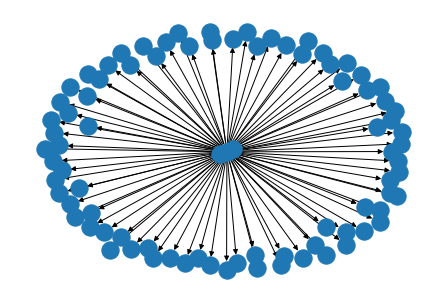

In [18]:
import rdflib.extras.external_graph_libs as EGL

# aanmaken van graaf, en vullen met gedownloade gedownloade triple store van Irma Sluis
irma=Graph()
irma.parse('https://dbpedia.org/resource/Irma_Sluis')

# converteren van RDF triple store naar networkx graaf
Irma = EGL.rdflib_to_networkx_digraph(irma, calc_weights=False,
        edge_attrs=lambda s, p, o: {'triples': [(s, p, o)]})

# teken deze graaf
nx.draw(Irma)

# we kunnen ook gelijk wat andere berekeningen doen met networkx!
print("Type: ", type(Irma))
print("Grootte: ", H.size())
print("Aantal nodes: ", len(Irma.nodes()))
print("Aantal edges: ", len(Irma.edges()))
print("Dichtheid: ", nx.density(Irma))
print("Outdegree node Irma: ", list(Irma.out_degree())[0][1])
print("Indegree node Irma: ", list(Irma.in_degree())[0][1])
print("Gewoon een tiental random nodes die al veel zeggen over Irma: ")
list(Irma)[:10]


We zijn aan het einde van deze tutorial over werken met `rdflib`! RDF kan heel handig zijn om een wildgroei van informatie op het web een structuur te geven. Er zijn nog veel meer mogelijkheden, waaronder uitbreidingen als RDF*, met statements over statements, dus er is nog genoeg te ontdekken in de wereld van het semantisch web.